In [6]:
# -*- coding*-
"""
Spyder Editor to convert to Ipython Notebook (Jupyter)
This is an example
"""

# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#1. Load dataset
from sklearn.datasets import load_iris
sample = load_iris()
dataset=pandas.DataFrame(sample.data, columns=sample.feature_names)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


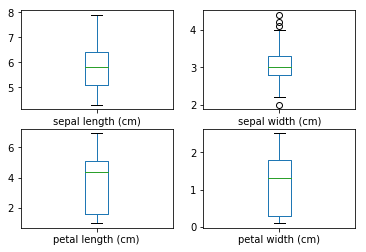

In [7]:
#2. Data Visualization
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

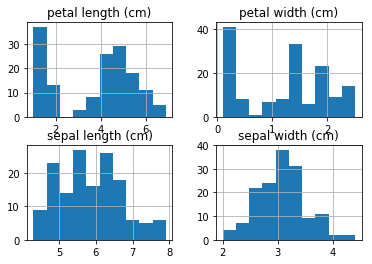

In [8]:
# histograms
dataset.hist()
plt.show()

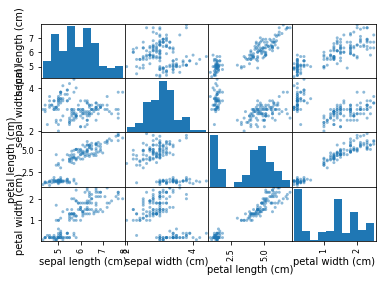

In [9]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [10]:
#3. Data Modelling
# Split-out validation dataset
X = sample.data
Y = sample.target
validation_size = 0.3
seed = 8
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
seed = 8
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn, using 10-fold cross validation to estimate accuracy
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    

LR: 0.930909 (0.089738)
LDA: 0.980000 (0.060000)
KNN: 0.961818 (0.062032)
CART: 0.990000 (0.030000)
NB: 0.980909 (0.038236)
SVM: 0.962727 (0.061180)


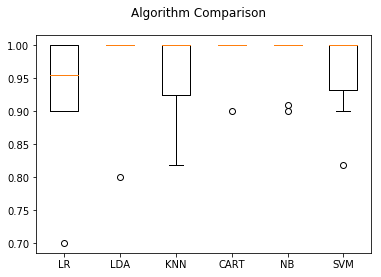

In [11]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()    

In [14]:
# Make predictions on validation dataset
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.911111111111
[[15  0  0]
 [ 0 15  1]
 [ 0  3 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.83      0.94      0.88        16
          2       0.92      0.79      0.85        14

avg / total       0.91      0.91      0.91        45

